In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [48]:
df = pandas.read_csv('~/Desktop/match_COSMOS_99_with_err_test.csv')
for c in range(df.shape[1] - 1):
    total = 0
    count = 0
    for val in df.iloc[:, c]:
        if not val == -99.9:
            count += 1
            total += val
    val_avg = total / count
    for r in range(df.shape[0]):
        if df.iloc[r, c] == -99.9:
            df.iloc[r, c] = val_avg

In [49]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=42)

In [51]:
knn_regressor = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn_regressor, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print(knn_cv.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


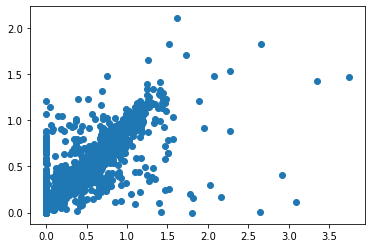

In [55]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
plt.scatter(y_test, y_pred)